<a href="https://colab.research.google.com/github/KLN-TBN/Notebooks/blob/main/ShallowNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CM20315 Shallow neural networks**

The purpose of this practical is to gain some familiarity with shallow neural networks.  It explores using different numbers of inputs and outputs, hidden units and activation functions. <br><br>

In various places you will see the words **"TO DO"**. Follow the instructions at these places.  If you can't figure out what is going on or how to complete the section, feel free to ask your fellow students or the TAs in the practical session or via Moodle.  This does not count toward your final marks, but completing it will help you do well in your coursework and exam and reduce your stress levels later on. 


In [ ]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

Let's first construct the shallow neural network with one input, three hidden units, and one output described in section 4.1 of the book.

In [ ]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  # TODO write code to implement the ReLU and compute the activation at the 
  # hidden unit from the preactivation
  # This should work on every element of the ndarray "preactivation" at once
  # One way to do this is with the ndarray "clip" function
  # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.clip.html
  activation = preactivation.clip(0)
  return activation

<function matplotlib.pyplot.show(*args, **kw)>

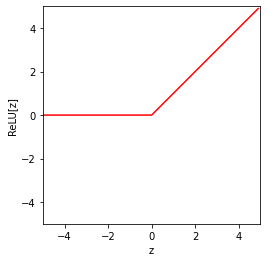

In [ ]:
# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show

In [ ]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # TODO Replace the lines below to compute the three initial lines 
  # (figure 3.3a-c) from the theta parameters.  These are the preactivations
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x
  # Pass these through the ReLU function to compute the activations as in 
  # figure 3.3 d-f
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure 3.3 g-i
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  # TODO Replace the code below to combing the weighted activations and add 
  # phi_0 to create the output as in figure 3.3 j
  y = phi_0 + w_act_1 + w_act_2 + w_act_3
  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [ ]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3 
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $y$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
  plt.show()

Now let's run the neural network.  If your code is correct, then the final output should look like this:
Correct nn output.svg

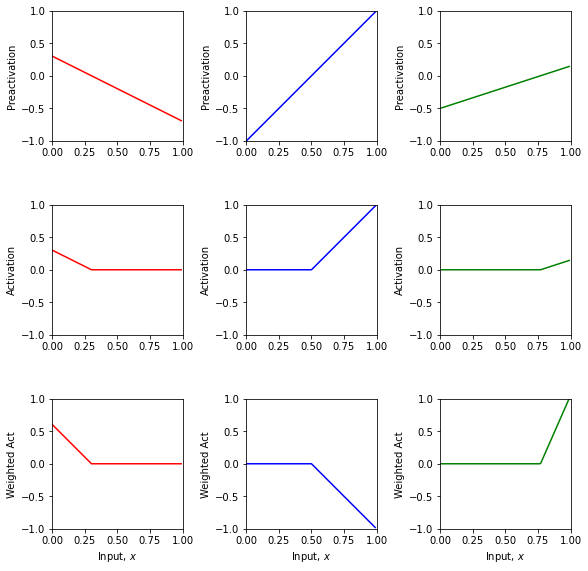

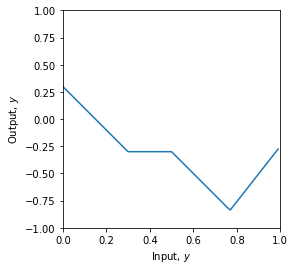

In [ ]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

Now let's play with the parameters to make sure we understand how they work.  The original  parameters were:

$\theta_{10} =  0.3$ ; $\theta_{20} = -1.0$<br>
$\theta_{20} =  -1.0$ ; $\theta_{21} = 2.0$<br>
$\theta_{30} =  -0.5$ ; $\theta_{31} = 0.65$<br>
$\phi_0 = -0.3; \phi_1 = 2.0; \phi_2 = -1.0; \phi_3 = 7.0$

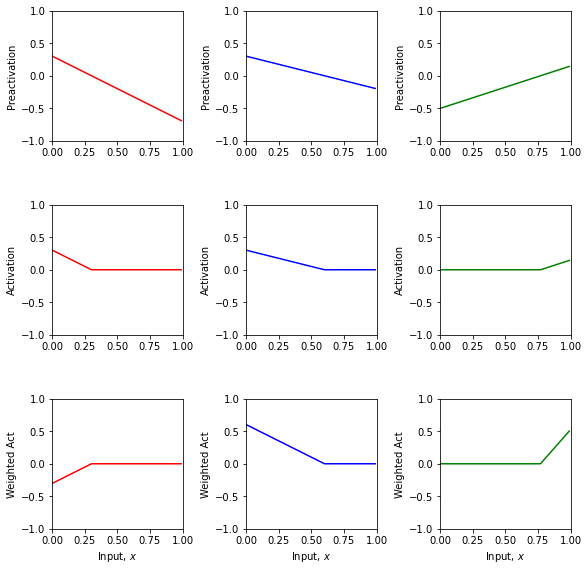

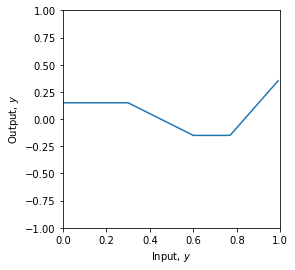

In [ ]:
# TODO
# 1. Predict what effect changing phi_0 will have on the network.  
#   Answer: It will change the y-intercept of the entire line
# 2. Predict what effect multplying phi_1, phi_2, phi_3 by 0.5 would have.  Check if you are correct
#   Answer: All the gradients halve
# 3. Predict what effect multiplying phi_1 by -1 will have.  Check if you are correct.
#   Answer: The line before the first joint will flip gradient
# 4. Predict what effect setting theta_20 to -1.2 will have.  Check if you are correct.
#   Answer: It will take longer for the activation to be above zero so the straight line will become longer and the thrid joint will have a higher y value
# 5. Change the parameters so that there are only two "joints" (including outside the range of the plot) 
# There are actually three ways to do this. See if you can figure them all out
# Answer: Make it with only 2 hidden units instead, give 2 lines the exact same thetas and phis
# 6. With the original parameters, the second line segment is flat (i.e. has slope zero)
# How could you change theta_10 so that all of the segments have non-zero slopes
# Answer: increasing theta_10 would decrease the size of the horizontal line
# 7. What do you predict would happen if you multiply theta_20 and theta21 by 0.5, and phi_2 by 2.0?
# Check if you are correct.
# Answer: nothing
# 8. What do you predict would happen if you multiply theta_20 and theta21 by -0.5, and phi_2 by -2.0?
# Check if you are correct.
# Answer: the activation would flip

theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0
phi_0 *= 0.5; phi_1 *= 0.5; phi_2 *= 0.5; phi_3 *= 0.5;
phi_1 *= -1
theta_20 = -1.2
theta_20 *= 0.5  ; theta_21 *= 0.5; phi_2 *= 2 
theta_20 *= -0.5  ; theta_21 *= -0.5; phi_2 *= -2 

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Different activation functions

The ReLU isn't the only kind of activation function.  For a long time, people used sigmoid functions.  A logistic sigmoid function is defined by the equation

\begin{equation}
f[h] = \frac{1}{1+\exp{[-10 z ]}}
\end{equation}

(Note that the factor of 10 is not standard -- but it allow us to plot on the same axes as the ReLU examples)

In [ ]:
# Define the sigmoid function
def sigmoid(preactivation):
  # TODO write code to implement the sigmoid function and compute the activation at the 
  # hidden unit from the preactivation.  Use the np.exp() function.
  activation = 1/(1 + np.exp(-10*preactivation))
  return activation

<function matplotlib.pyplot.show(*args, **kw)>

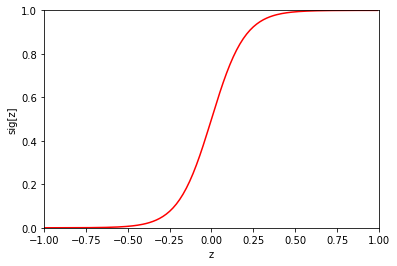

In [ ]:
# Make an array of inputs
z = np.arange(-1,1,0.01)
sig_z = sigmoid(z)

# Plot the sigmoid function
fig, ax = plt.subplots()
ax.plot(z,sig_z,'r-')
ax.set_xlim([-1,1]);ax.set_ylim([0,1])
ax.set_xlabel('z'); ax.set_ylabel('sig[z]')
plt.show

Let's see what happens when we use this activation function in a neural network

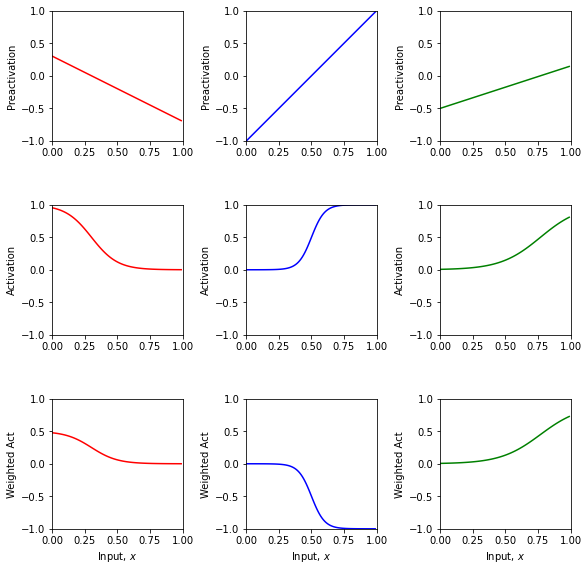

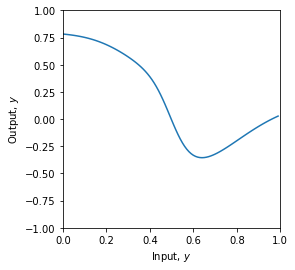

In [ ]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9
#phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0


# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, sigmoid, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

You probably notice that this gives nice smooth curves.  So why don't we use this?  Aha... it's not obvious right now, but we will get to it when we learn to fit models.

# Linear activation functions

However, neural networks don't work if the activation function is linear.  For example, consider what would happen if the activation function was: 

\begin{equation}
\mbox{lin}[z] = a + bz
\end{equation}

In [ ]:
# Define the linear activation function
def lin(preactivation):
  a =0.5
  b =-0.4
  # Compute linear function
  activation = a+b * preactivation
  # Return
  return activation

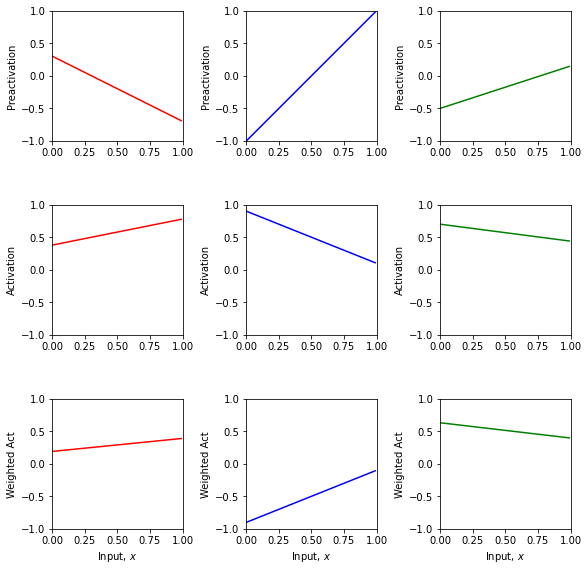

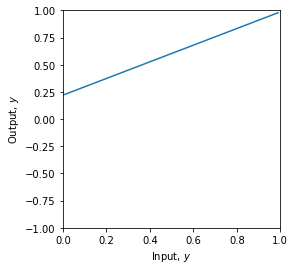

In [ ]:
# TODO 
# 1. The linear activation function above just returns the input: (0+1*z) = z
# Before running the code Make a prediction about what the ten panels of the drawing will look like
# Now run the code below to see if you were right. What family of functions can this represent?  
 
# 2. What happens if you change the parameters (a,b) to different values?  
# Try a=0.5, b=-0.4 (don't forget) to run the cell again to update the function
#still would be one final line


theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, lin, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Least squares loss

Now let's consider fitting the network to data.  First we need to define the loss function.  We'll use the least squares loss:

\begin{equation}
L[\boldsymbol\phi] = \sum_{i=1}^{I}(y_{i}-\mbox{f}[x_{i},\boldsymbol\phi])^2
\end{equation}

where $(x_i,y_i)$ is an input/output training pair and $\mbox{f}[\bullet,\boldsymbol\phi]$ is the neural network with parameters $\boldsymbol\phi$.  The first term in the brackets is the ground truth output and the second term is the prediction of the model

In [ ]:
# Least squares function
def least_squares_loss(y_train, y_predict):
  # TODO Replace the line below to use compute the sum of squared
  # differences between the real and predicted values of y
  # you will need to use the function np.sum
  loss = np.sum((y_train - y_predict)**2)
  return loss

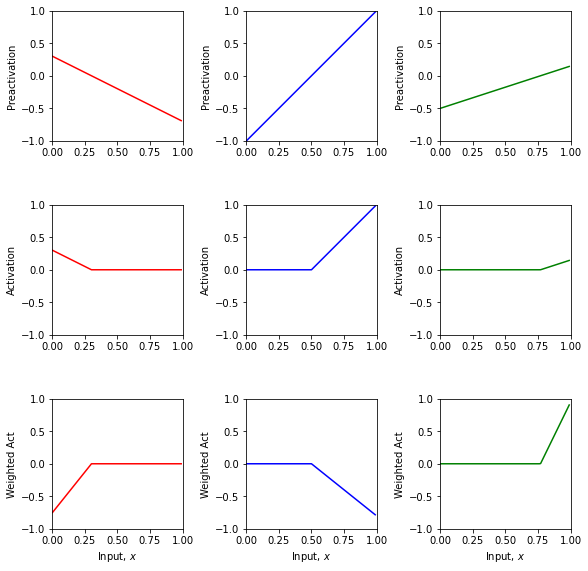

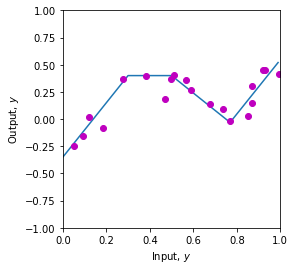

Loss = 0.169


In [ ]:
# Now lets define some parameters, run the neural network, and compute the loss
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.4; phi_1 = -2.5; phi_2 = -0.8; phi_3 = 6.3

# Define a range of input values
x = np.arange(0,1,0.01)

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data = x_train, y_data = y_train)

# Run the neural network on the training data
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print("Loss = %3.3f"%(loss))

# TODO.  Manipulate the parameters (by hand!) to make the function 
# fit the data better and try to reduct the loss to as small a number 
# as possible.  The best that I could do was 0.181
# Tip... start by manipulating phi_0.
# It's not that easy, so don't spend too much time on this!

# Networks with two inputs

(Optional) If you are feeling keen, then there is a template below to build a neural network that takes two inputs similar to figure 3.8.  

In [ ]:
# Code to draw 2D function -- read it so you know what is going on, but you don't have to change it
def draw_2D_function(ax, x1_mesh, x2_mesh, y, draw_heatmap=False):
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    if draw_heatmap:
      fig.colorbar(pos, ax=ax)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')

# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3 
def plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
    draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
    draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
    draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
    draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
    draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
    draw_2D_function(ax[2,0], x1,x2,w_act_1); ax[2,0].set_title('Weighted Act')
    draw_2D_function(ax[2,1], x1,x2,w_act_2); ax[2,1].set_title('Weighted Act')
    draw_2D_function(ax[2,2], x1,x2,w_act_3); ax[2,2].set_title('Weighted Act')
    plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y,draw_heatmap=True)
  ax.set_title('Network ouptut, $y$')
  ax.set_aspect(1.0)
  plt.show()

In [ ]:
# Define a shallow neural network with, two inputs, one output, and three hidden units
def shallow_2_1_3(x1,x2, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):
  # TODO Replace the lines below to compute the three initial linear functions 
  # (figure 3.8a-c) from the theta parameters.  These are the preactivations
  pre_1 = theta_10 + theta_11*x1 + theta_12*x2
  pre_2 = theta_20 + theta_21*x1 + theta_22*x2
  pre_3 = theta_30 + theta_31*x1 + theta_32*x2
  # Pass these through the ReLU function to compute the activations as in 
  # figure 3.8 d-f
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure 3.8 g-i
  w_act_1 = phi_1*act_1
  w_act_2 = phi_2*act_2
  w_act_3 = phi_3*act_3
  # TODO Replace the code below to combing the weighted activations and add 
  # phi_0 to create the output as in figure 3.8j
  y = phi_0+w_act_1+w_act_2+w_act_3
  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

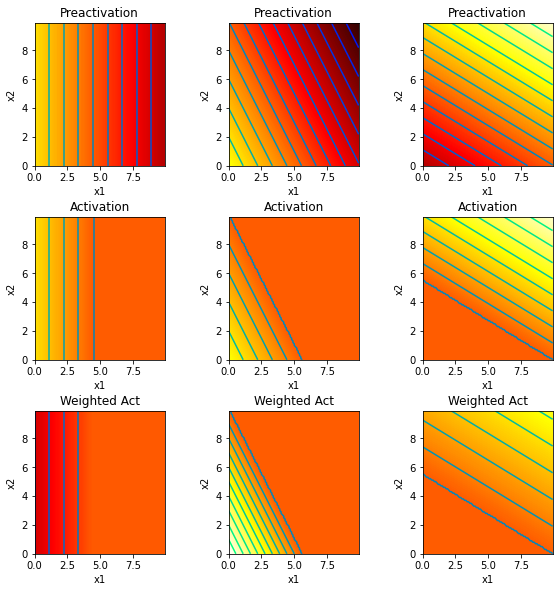

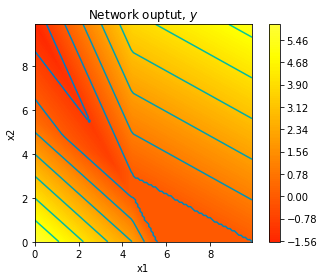

In [ ]:
# Now lets define some parameters and run the neural network
theta_10 =  4.0 ;  theta_11 = -0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -5  ; theta_31 = 0.5; theta_32 = 0.9
phi_0 = 0.0; phi_1 = -1.0; phi_2 = 2.0; phi_3 = 0.6

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_2_1_3(x1,x2, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# And then plot it
plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

